In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import math
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
fashion=keras.datasets.fashion_mnist

In [3]:
(x_train,y_train),(x_test,y_test)=fashion.load_data()

In [4]:
print('shape of trainging data',x_train.shape)
print('y_train',y_train.shape)
print('shape of testing data',x_test.shape)
print('y_test',y_test.shape)

shape of trainging data (60000, 28, 28)
y_train (60000,)
shape of testing data (10000, 28, 28)
y_test (10000,)


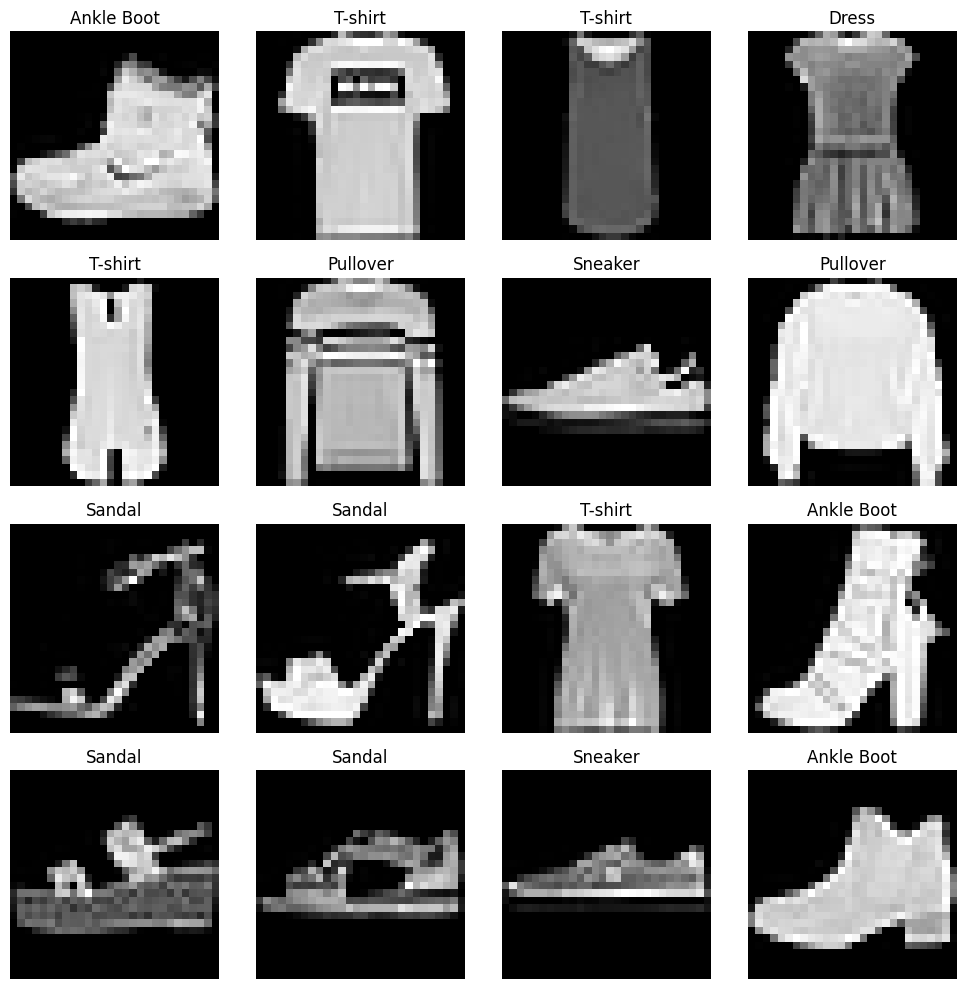

In [5]:
class_names = ["T-shirt", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle Boot"]
plt.figure(figsize=(10,10))
for i in range(16):
  plt.subplot(4,4,i+1)
  plt.imshow(x_train[i],cmap='gray')
  plt.title(class_names[y_train[i]])
  plt.axis('off')
plt.tight_layout()
plt.show()

normalize value

In [6]:
x_train_norm=x_train/255
x_test_norm=x_test/255

one-hot encode labels

In [7]:
y_train_ohe=keras.utils.to_categorical(y_train,10)
y_test_ohe=keras.utils.to_categorical(y_test,10)

#BUILD FULLY CONNECTED NEURAL NETWORK

In [8]:
def build_fcnn():
  model=keras.Sequential([
      layers.Flatten(input_shape=(28,28)),
      layers.Dense(512,activation='relu'),
      layers.Dense(256,activation='relu'),
      layers.Dense(128,activation='relu'),
      layers.Dense(64,activation='relu'),
      layers.Dense(10,activation='softmax')
  ])
  return model

In [9]:
model = build_fcnn()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [10]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 575,050 (2.19 MB)

 Trainable params: 575,050 (2.19 MB)

 Non-trainable params: 0 (0.00 B)

#COMPILE MODEL

In [11]:
model.compile(optimizer='sgd',loss='categorical_crossentropy',metrics=['accuracy'])

In [12]:
history=model.fit(x_train_norm,y_train_ohe,epochs=30,validation_data=(x_test_norm,y_test_ohe),validation_split=0.2,batch_size=128)

Epoch 1/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 16ms/step - accuracy: 0.4827 - loss: 1.6258 - val_accuracy: 0.7478 - val_loss: 0.7328
Epoch 2/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.7752 - loss: 0.6609 - val_accuracy: 0.7924 - val_loss: 0.5913
Epoch 3/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.8079 - loss: 0.5507 - val_accuracy: 0.8219 - val_loss: 0.5211
Epoch 4/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.8292 - loss: 0.4902 - val_accuracy: 0.8064 - val_loss: 0.5567
Epoch 5/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.8375 - loss: 0.4605 - val_accuracy: 0.8245 - val_loss: 0.4913
Epoch 6/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.8473 - loss: 0.4388 - val_accuracy: 0.8385 - val_loss: 0.4582
Epoch 7/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.8524 - loss: 0.4176 - val_accuracy: 0.8425 - val_loss: 0.4472
Epoch 8/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 0.8567 - loss: 0.4086 - val_accu

#PLOT TRAINING & VALIDATION ACCURACY

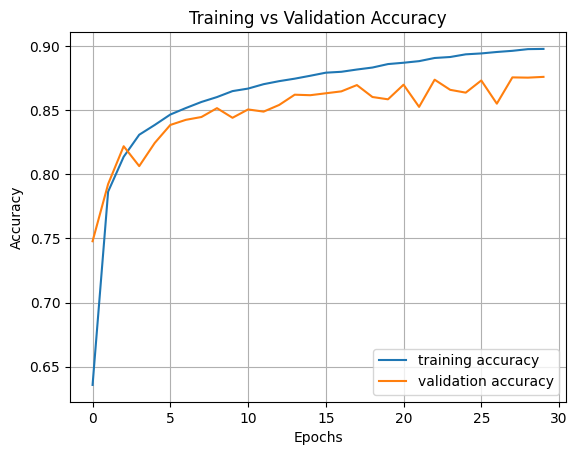

In [19]:
plt.plot(history.history['accuracy'],label='training accuracy')
plt.plot(history.history['val_accuracy'],label='validation accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training vs Validation Accuracy")
plt.grid()
plt.legend()

#PLOT TRAINING & VALIDATION LOSS

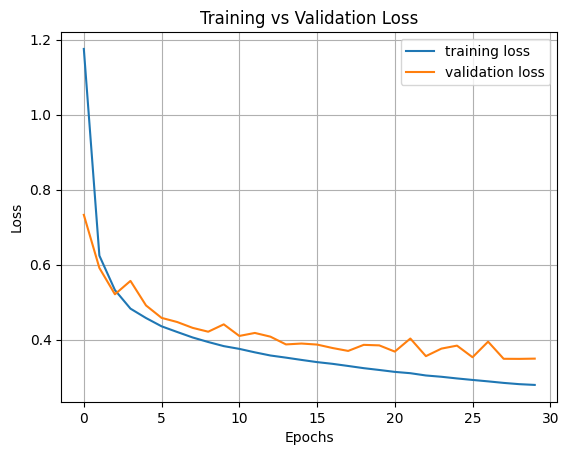

In [20]:
plt.plot(history.history['loss'],label='training loss')
plt.plot(history.history['val_loss'],label='validation loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training vs Validation Loss")
plt.grid()
plt.legend()

#MODEL EVALUATION

In [21]:
test_loss,test_acc=model.evaluate(x_test_norm,y_test_ohe)
print("Test Loss:",test_loss)
print("Test Accuracy:",test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8789 - loss: 0.3451
Test Loss: 0.34956303238868713
Test Accuracy: 0.8759999871253967


#CONFUSION MATRIX & CLASSIFICATION REPORT

In [22]:
y_pred=model.predict(x_test_norm)
y_pred_classes=np.argmax(y_pred,axis=1)

cm = confusion_matrix(y_test, y_pred_classes)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


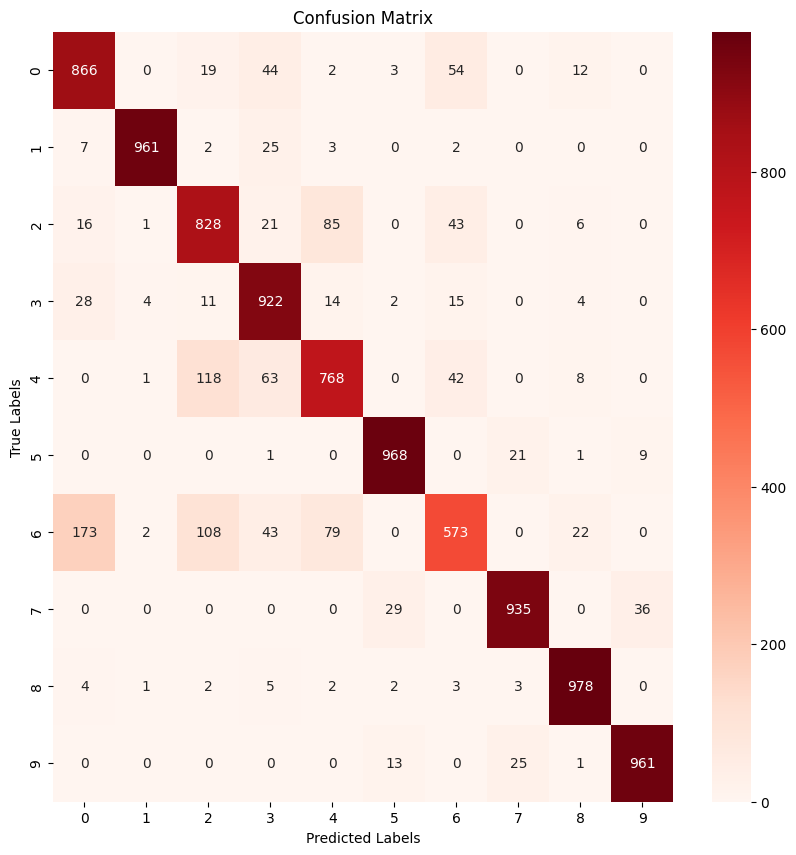

In [23]:
plt.figure(figsize=(10,10))
sns.heatmap(cm,annot=True,fmt='d',cmap='Reds')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [24]:
print(classification_report(y_test,y_pred_classes,target_names=class_names))

              precision    recall  f1-score   support

     T-shirt       0.79      0.87      0.83      1000
     Trouser       0.99      0.96      0.98      1000
    Pullover       0.76      0.83      0.79      1000
       Dress       0.82      0.92      0.87      1000
        Coat       0.81      0.77      0.79      1000
      Sandal       0.95      0.97      0.96      1000
       Shirt       0.78      0.57      0.66      1000
     Sneaker       0.95      0.94      0.94      1000
         Bag       0.95      0.98      0.96      1000
  Ankle Boot       0.96      0.96      0.96      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.87     10000
weighted avg       0.88      0.88      0.87     10000

